# Notebook used for producing final processed data to go into the Report

In [2]:
import os 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob
from astroquery.vizier import Vizier
import seaborn as sns 
from astropy.io import fits
import astropy.coordinates as coord
from astropy.coordinates import Angle
from matplotlib.ticker import MaxNLocator

Vizier.ROW_LIMIT = -1

In [3]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

## Importing Supplementary Data

In [55]:
bossini_et_al = Vizier.get_catalogs('J/A+A/623/A108')[0]
print(bossini_et_al.keys())
bossini_dist = bossini_et_al['Dist']; 
bossini_age = 10**bossini_et_al['logA']; bossini_age_e = abs(10**bossini_et_al['E_logA'] - bossini_age)
bossini_FeH = bossini_et_al['Fe_H']

print(len(bossini_et_al))

['Cluster', 'RA_ICRS', 'DE_ICRS', 'logA', 'e_logA', 'E_logA', 'Dist', 'e_Dist', 'E_Dist', 'AV', 'e_AV', 'E_AV', 'AGTO', 'e_AGTO', 'E_AGTO', 'Fe_H', 'r_Fe_H', 'SimbadName', '_RA.icrs', '_DE.icrs']
269


In [4]:
catalog_list = Vizier.get_catalogs('J/A+A/640/A1')
print(catalog_list.keys())
print(len(catalog_list[0]))

['J/A+A/640/A1/table1', 'J/A+A/640/A1/nodup']
2017


In [5]:
cantant_gaudin_et_al = catalog_list[0]
print(cantant_gaudin_et_al.keys())

agemask = cantant_gaudin_et_al['AgeNN'] > 9

cantant_age = 10**(cantant_gaudin_et_al['AgeNN'][agemask]); cantant_dist =  cantant_gaudin_et_al['DMNN'][agemask]
cantant_Z = cantant_gaudin_et_al['Z'][agemask]
print(len(cantant_age))

['Cluster', 'RA_ICRS', 'DE_ICRS', 'r50', 'nbstars07', 'pmRA_', 'pmDE', 'plx', 'Flag', 'AgeNN', 'AVNN', 'DMNN', 'DistPc', 'X', 'Y', 'Z', 'Rgc', 'SimbadName', '_RA.icrs', '_DE.icrs']
260


In [58]:
SgrA = SkyCoord(359.94423568, -0.04616002, unit = 'deg', frame = 'galactic')

SgrA.b

<Latitude -0.04616002 deg>

# HyperLEDA Data

In [59]:
catalog_list = Vizier.get_catalogs('VII/238/hidat')
print(catalog_list.keys())

bossini_locations = SkyCoord(bossini_et_al['RA_ICRS'], bossini_et_al['DE_ICRS'], unit=(u.hourangle, u.deg))

Vizier.query_region(bossini_locations[0], radius=Angle(0.1, "deg"),  catalog='apass9')[0]


['VII/238/hidat']


recno,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,Field,nobs,mobs,B-V,e_B-V,Vmag,e_Vmag,Bmag,e_Bmag,g_mag,e_g_mag,r_mag,e_r_mag,i_mag,e_i_mag
,deg,deg,arcsec,arcsec,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,float64,float64,float32,float32,int64,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
16272170,0.878525,-30.052558,0.776,1.074,20180030,7,49,0.622,0.063,15.505,0.017,16.127,0.060,15.789,0.006,15.350,0.094,15.161,0.043
16272171,0.879022,-30.052321,1.266,1.377,20180035,2,5,--,--,--,--,--,--,--,--,--,--,--,--
16272173,0.886251,-30.049555,1.168,0.916,20161425,2,2,--,--,--,--,--,--,--,--,--,--,15.286,0.102
16272185,0.915776,-30.035989,0.268,0.107,20131425,11,189,0.537,0.049,11.403,0.023,11.939,0.043,11.639,0.023,11.270,0.041,11.181,0.041
16272186,0.916137,-29.978605,1.264,1.192,20161541,2,3,1.508,0.268,16.957,0.000,18.464,0.268,--,--,--,--,15.166,0.000
16272188,0.937765,-29.943001,0.800,1.114,20161541,2,3,1.031,0.000,16.487,0.000,17.518,0.000,--,--,--,--,16.263,0.211
16272192,0.791993,-30.021433,1.225,0.999,20161541,3,12,1.160,0.048,16.413,0.046,17.573,0.014,17.009,0.000,16.209,0.000,--,--
16272193,0.841116,-30.019589,0.305,0.094,20131425,10,181,0.401,0.048,10.360,0.030,10.761,0.038,10.491,0.023,10.301,0.032,10.264,0.041


## Classified Targets

In [4]:
targets = pd.read_csv('supplementary_data/targetlist.csv')
observed = targets.loc[[np.where(targets['Group'] == 1)][0]]

proposed = targets.loc[[np.where(targets['Group'] == 2)][0]]
prop_dist = proposed['DistanceMod']; prop_age = 10**(proposed['Age']); prop_rgc = proposed['Rgc']

print(observed.head())

         Name    RAJ2000   DEJ2000  Age Myr       Age    Rgc   FeH   Color  \
0  Berkeley 28  06 52 12  02 56 00       63  8.799341  12702  0.20  1.1000   
1    Bochum 2   06 48 54  00 23 00        5  7.698970      0 -0.02  0.9700   
2     NGC 2324  07 04 07  01 02 42      427  9.630428   4214 -0.50  0.2560   
3     NGC 2355  07 16 59  13 45 00      676  9.829947  10112 -0.07  0.3126   

   DistanceMod      z  Group  
0       13.700  123.0      1  
1       14.790   10.8      1  
2       13.300  242.0      1  
3       11.603  397.0      1  


In [1]:
this_work = SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 1)[0]], targets['DEJ2000'][np.where(targets['Group'] == 1)[0]], frame='fk5', unit=(u.hourangle, u.deg))
print(this_work)
galtw = this_work.galactic

proposed =  SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 2)[0]], targets['DEJ2000'][np.where(targets['Group'] == 2)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galprop = proposed.galactic

bossini_locations = bossini_locations.galactic

cantant_gaudin_locations = SkyCoord(cantant_gaudin_et_al['RA_ICRS'], cantant_gaudin_et_al['DE_ICRS'], unit=(u.hourangle, u.deg))[agemask]
cantant_gaudin_locations = cantant_gaudin_locations.galactic

print(len(cantant_gaudin_locations))

NameError: name 'SkyCoord' is not defined

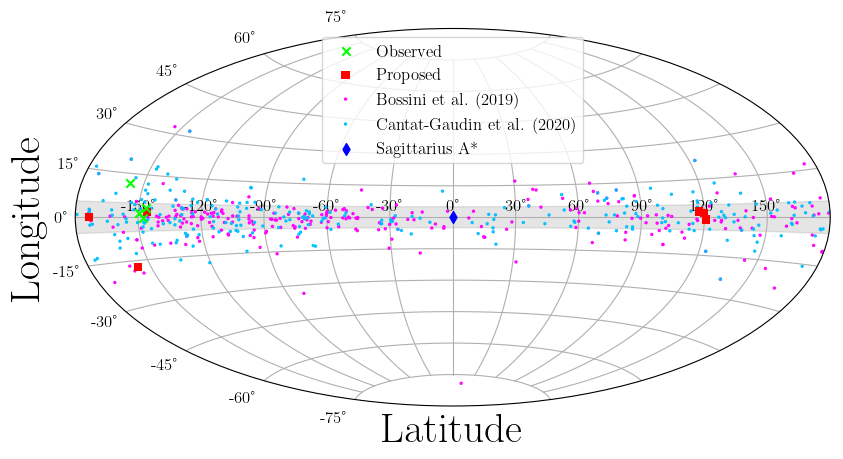

In [62]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5), dpi = 100)
plt.subplot(111, projection='aitoff')

plt.scatter(galtw.l.wrap_at('180d').radian, galtw.b.radian, marker = 'x', color = 'lime', label = 'Observed', zorder = 5)
plt.scatter(galprop.l.wrap_at('180d').radian, galprop.b.radian, marker = 's', facecolor = 'red', edgecolor = 'None', label = 'Proposed', zorder = 4)
plt.scatter(bossini_locations.l.wrap_at('180d').radian, bossini_locations.b.radian, marker = 'o', facecolor = 'None', edgecolor = 'fuchsia', label = 'Bossini et al. (2019)', zorder = 2, s = 2)
plt.scatter(cantant_gaudin_locations.l.wrap_at('180d').radian, cantant_gaudin_locations.b.radian, marker = 'o', facecolor = 'None', edgecolor = 'deepskyblue', label = 'Cantat-Gaudin et al. (2020)', zorder = 2, s = 2)
plt.scatter(SgrA.l.wrap_at('180d').radian, SgrA.b.radian, marker = 'd', color = 'Blue', label = 'Sagittarius A*', zorder = 4)

plt.axhspan(np.deg2rad(-5), np.deg2rad(5), alpha=0.2, color='grey')
plt.grid(True)
plt.legend(loc = 'best', prop={'size': 12})
plt.xlabel('Latitude'); plt.ylabel('Longitude')
plt.savefig('plots/target_selection.pdf', transparent=True)

# Log Age vs. Distance Modulus

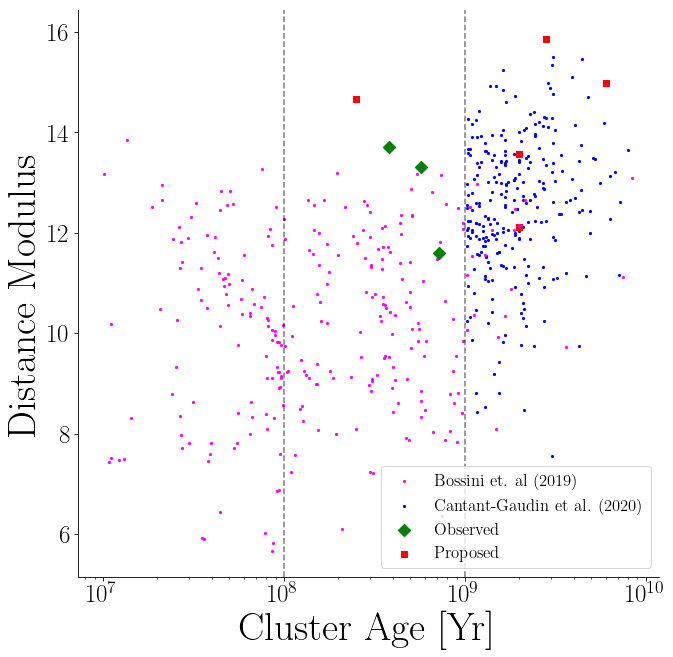

In [63]:
plt.rcParams.update({'font.size': 24})
plt.figure(figsize = (10, 10), dpi = 75)


plt.scatter(bossini_age, bossini_dist, label = 'Bossini et. al (2019)', color = 'fuchsia',  zorder = 2, s = 4)
plt.scatter(cantant_age, cantant_dist, label = 'Cantant-Gaudin et al. (2020)', color = 'blue', s = 4)

plt.scatter(10**observed['Age'], observed['DistanceMod'], color = 'green', marker = 'D', label = 'Observed', zorder = 4, s = 70)
plt.scatter(prop_age, prop_dist, color = 'red', marker = 's', label = 'Proposed')

plt.axvline(10**9, linestyle = '--', zorder = 3, alpha = 0.5, color = 'k')
plt.axvline(10**8, linestyle = '--', zorder = 3, alpha = 0.5, color = 'k')


plt.legend(loc = 4, prop={'size': 16})
plt.ylabel('Distance Modulus', fontsize = 38)
plt.xscale("log")
plt.xlabel('Cluster Age [Yr]', fontsize = 38)
plt.savefig('plots/supplementary_data_plot.pdf')

# Large HR-Diagram Plot

In [64]:
file_name = sorted(glob.glob('supplementary_data/Proposed_Stars_CCD_data/*.txt')); print(file_name)
label_names = ['Berkeley 20', 'Berkeley 34', 'NGC 2129', 'King 1', 'King 15', 'Stock 18']

cal_mags_fnames = sorted(glob.glob('calibrated_mags/*csv')); print(cal_mags_fnames)
label_names_2 = ['NGC 2324', 'NGC 2355', 'Berkeley 28', 'Bochum 2']


ages = (10**np.array([9.78, 9.45, 9.345, 9.3, 8.4, 6.78]))/10**6 
color_palette = sns.color_palette("plasma")

print(proposed)

['supplementary_data/Proposed_Stars_CCD_data/Berkeley20.txt', 'supplementary_data/Proposed_Stars_CCD_data/Berkeley34.txt', 'supplementary_data/Proposed_Stars_CCD_data/NGC2129.txt', 'supplementary_data/Proposed_Stars_CCD_data/king1.txt', 'supplementary_data/Proposed_Stars_CCD_data/king15.txt', 'supplementary_data/Proposed_Stars_CCD_data/stock18.txt']
['calibrated_mags/NGC2324.csv', 'calibrated_mags/NGC2355.csv', 'calibrated_mags/berkeley28.csv', 'calibrated_mags/bochum2.csv']
<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [( 83.25      ,  0.21666667), (105.1       , -0.25      ),
     (  5.51666667, 64.36805556), (  8.225     , 61.86666667),
     ( 90.17083333, 23.31833333), (  0.40416667, 64.6175    )]>


(2, 276)
(2, 1106)
(2, 674)
(2, 4250)
(2, 3595)
(2, 1348)


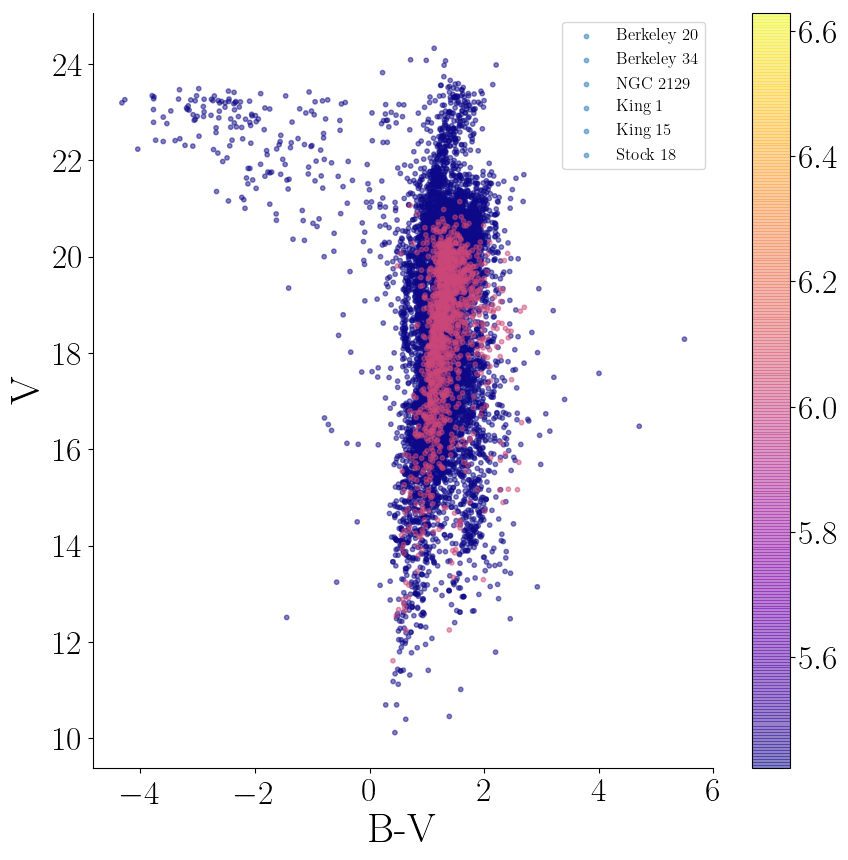

In [65]:
fig, ax = plt.subplots()

for i in range(0, len(file_name)):
    V_webda, BV_webda = np.loadtxt(file_name[i], usecols=(2,3), skiprows=1, unpack=True)
    print(np.shape([V_webda, BV_webda]))

    plt.scatter(BV_webda, V_webda, s = 10, alpha=0.5, cmap = 'plasma', label = label_names[i], c = (np.full(len(V_webda), ages[i])))

cbar = plt.colorbar()
plt.xlabel('B-V'); plt.ylabel('V')
plt.legend(prop={'size': 12})
# cbar.ax.set_ylabel('She drives', rotation=270, y = 0.4)


(2, 276)
(2, 1106)
(2, 674)
(2, 4250)
(2, 3595)
(2, 1348)


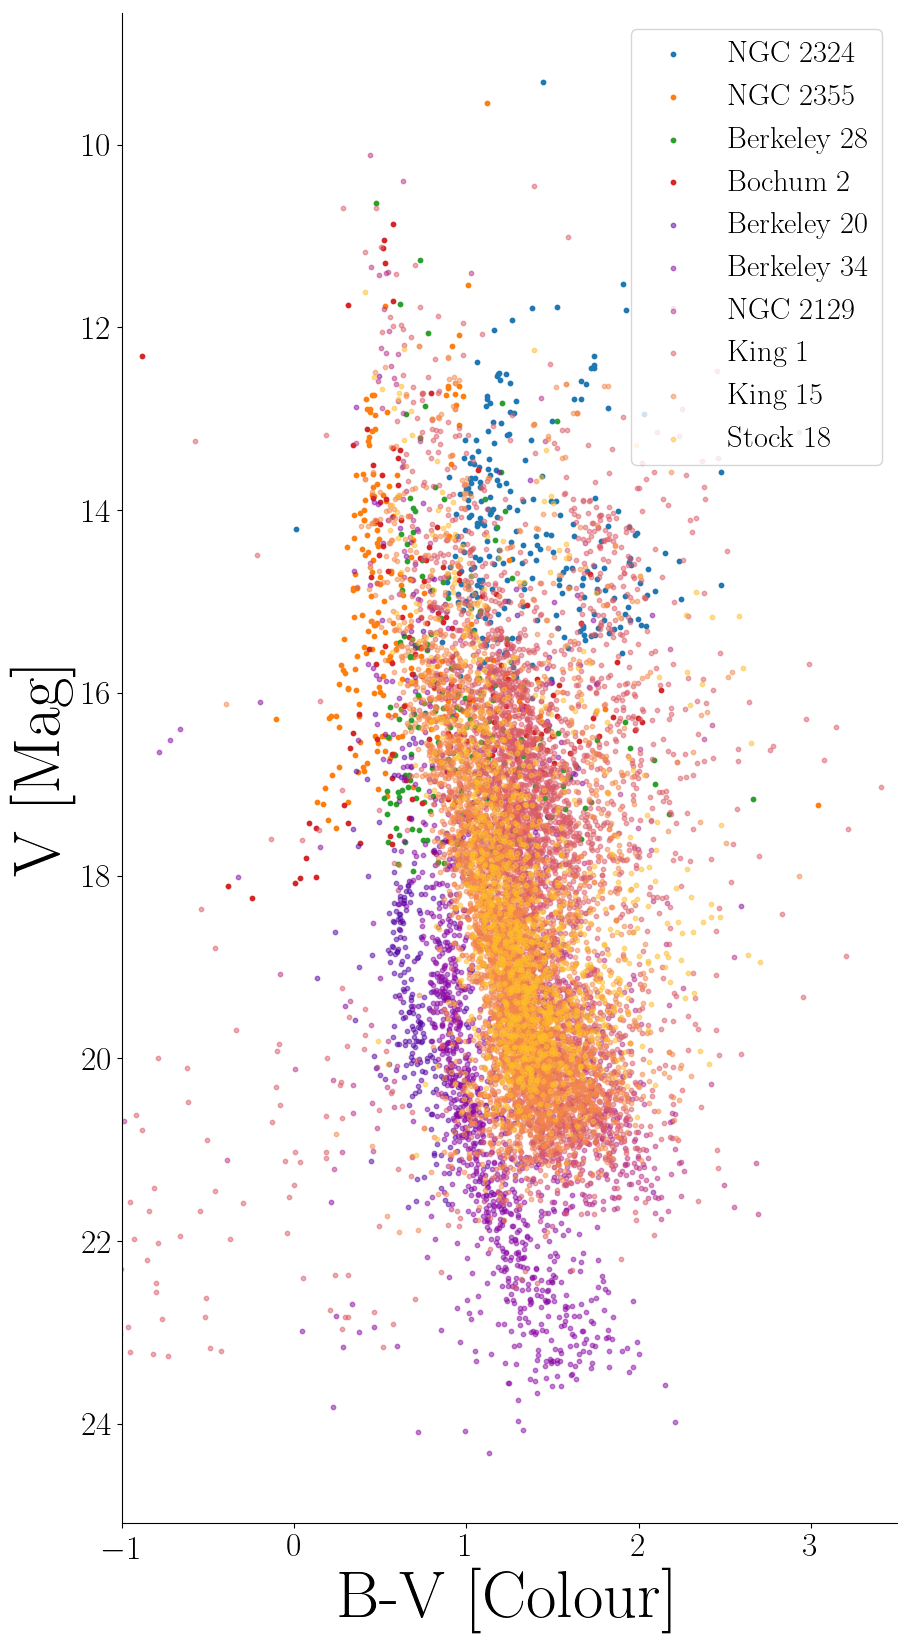

In [66]:
fig, ax = plt.subplots(figsize= (10, 20))
dot_size = 10

for i in range(0, len(cal_mags_fnames)):
    cal_data = pd.read_csv(cal_mags_fnames[i])
    plt.scatter((cal_data['mag_B'] -  cal_data['mag_V']), cal_data['mag_V'], s = dot_size, label = label_names_2[i])

for i in range(0, len(file_name)):
    V_webda, BV_webda = np.loadtxt(file_name[i], usecols=(2,3), skiprows=1, unpack=True)
    print(np.shape([V_webda, BV_webda]))

    plt.scatter(BV_webda, V_webda, s = dot_size, alpha=0.5, label = label_names[i], color = color_palette[i])


plt.xlabel('B-V [Colour]', fontsize = 48); plt.ylabel('V [Mag]', fontsize = 48)
# plt.ylim(-5, 12.5)
plt.xlim(-1, 3.5)
plt.legend(prop={'size': 22})
plt.gca().invert_yaxis()
plt.savefig('plots/master_cmd.pdf')

# Angular Seperation agianst varying age 

In [67]:
sep_bossini = bossini_locations.separation(SgrA).degree

In [5]:
# --- Loading Observed Data --- 
observed_red = observed[observed['Rgc'] > 0]
print(observed_red.head())
obsr_Rgc = observed_red['Rgc']; obsr_Age = observed_red['Age']


cantant_GD = cantant_gaudin_et_al['Rgc'][agemask]
cantant_Age = cantant_gaudin_et_al['AgeNN'][agemask]

         Name    RAJ2000   DEJ2000  Age Myr       Age    Rgc   FeH   Color  \
0  Berkeley 28  06 52 12  02 56 00       63  8.799341  12702  0.20  1.1000   
2     NGC 2324  07 04 07  01 02 42      427  9.630428   4214 -0.50  0.2560   
3     NGC 2355  07 16 59  13 45 00      676  9.829947  10112 -0.07  0.3126   

   DistanceMod      z  Group  
0       13.700  123.0      1  
2       13.300  242.0      1  
3       11.603  397.0      1  


NameError: name 'cantant_gaudin_et_al' is not defined

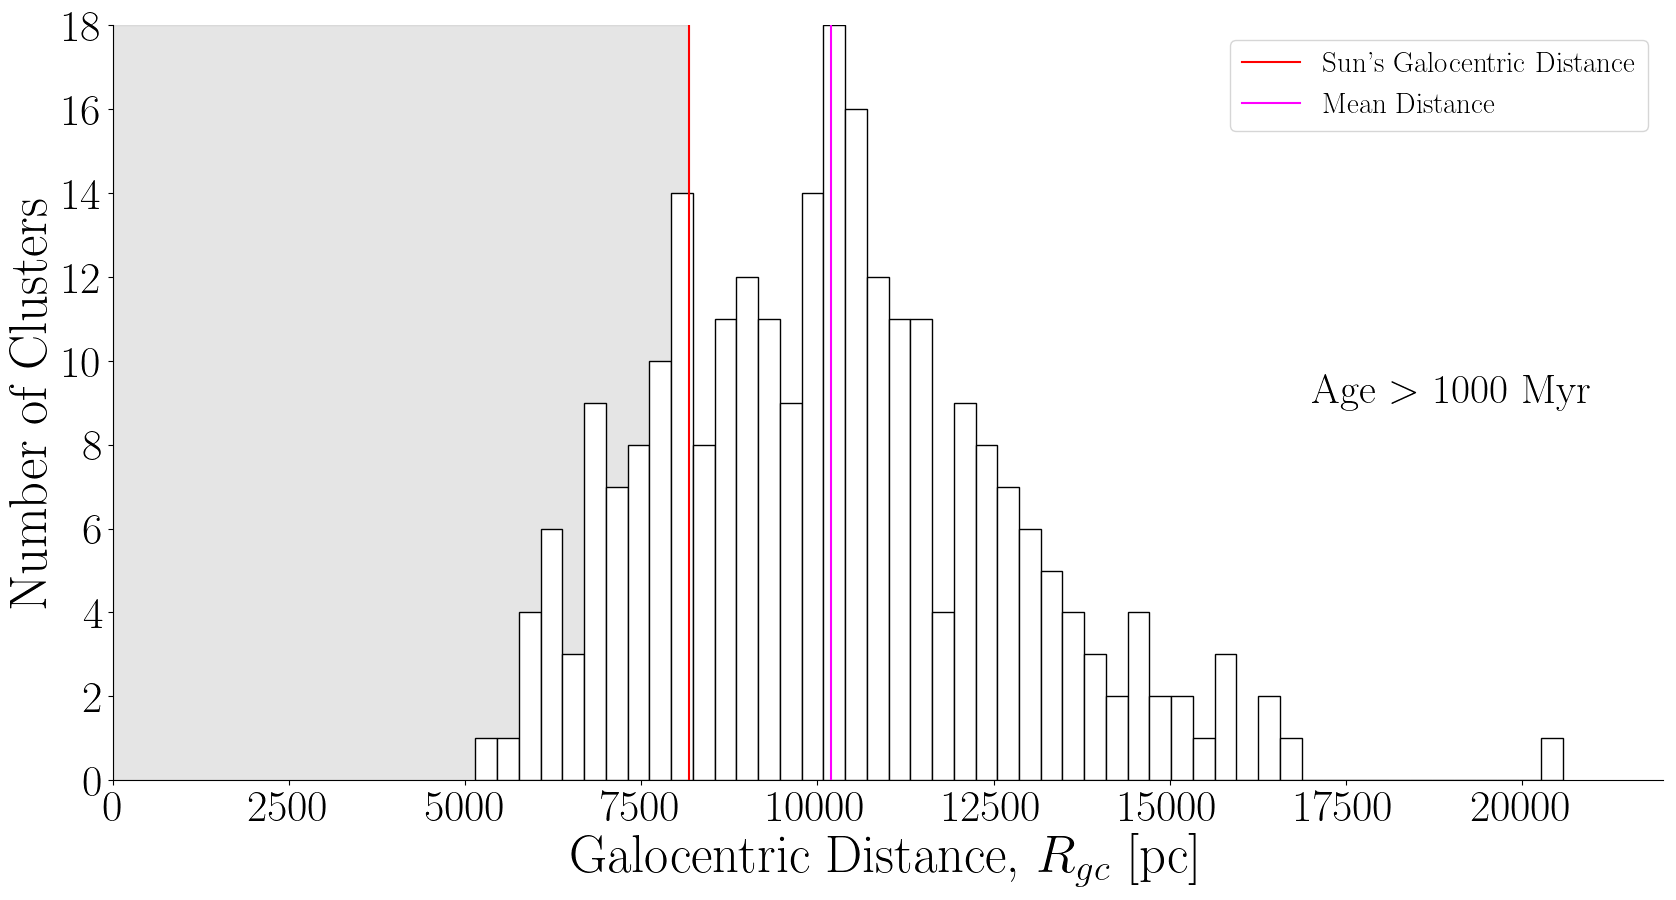

In [69]:
plt.figure(figsize=(20, 10))
plt.hist(cantant_GD, bins = 50, facecolor = 'white', edgecolor = 'k', zorder = 3)
plt.ylabel('Number of Clusters', fontsize = 38); plt.xlabel('Galocentric Distance, $R_{gc}$ [pc]', fontsize = 38)
plt.axvline(8180, linestyle = '-', color = 'red', label = 'Sun\'s Galocentric Distance', zorder = 3)
plt.axvline(cantant_GD.mean(), color = 'fuchsia', label = 'Mean Distance', zorder = 3)
plt.axvspan(0, 8180, color = 'k', alpha = 0.1, zorder = 0)
plt.xlim(0, 22000)

plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.annotate('Age $>$ 1000 Myr', (17000, 9), fontsize = 30)
plt.legend(prop={'size': 21})
# plt.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 18)
plt.savefig('plots/opencluster_distribution.png')
plt.show()


# len(cantant_GD[cantant_GD < 8180])
# plt.hist(cantant_Age[cantant_GD < 8180])

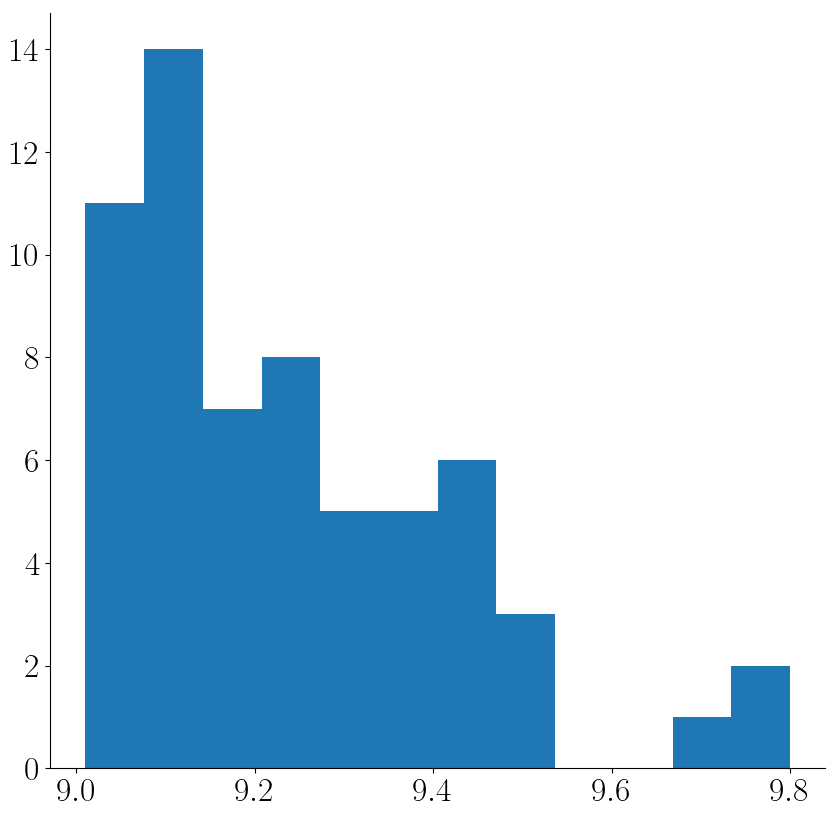

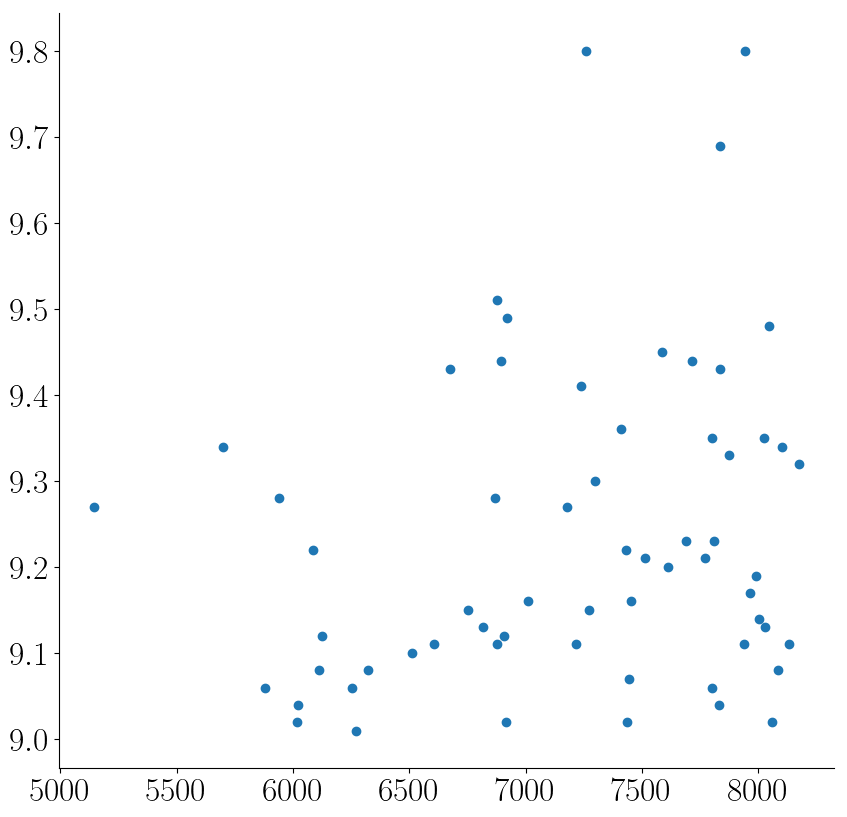

In [70]:
len(cantant_GD[cantant_GD < 8180])
plt.hist(cantant_Age[cantant_GD < 8180], bins = 12)

plt.show()

plt.scatter(cantant_GD[cantant_GD < 8180], cantant_Age[cantant_GD < 8180])

# Age vs. Distance to the Galactic Plane 

In [71]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

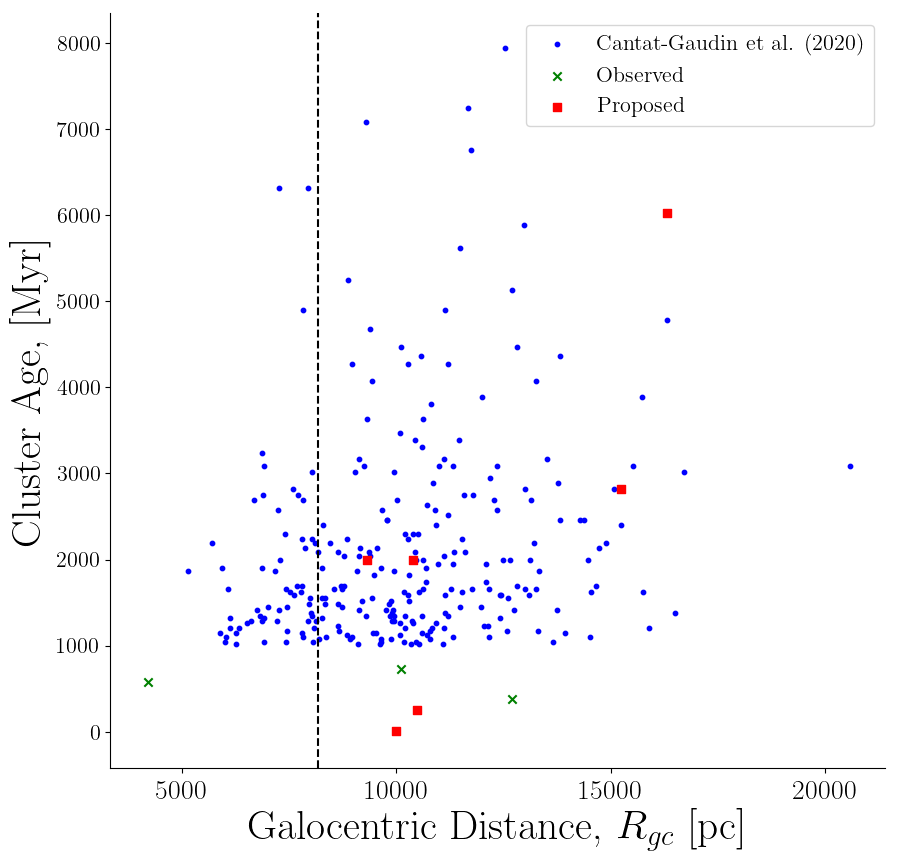

In [72]:

plt.scatter(cantant_gaudin_et_al['Rgc'][agemask], cantant_age/10**6, s = 10, color = 'blue', label = 'Cantat-Gaudin et al. (2020)')
plt.scatter(observed_red['Rgc'], (10**observed_red['Age'])/10**6, marker='x', color = 'green', label = 'Observed')
plt.scatter(prop_rgc, prop_age/10**6, color = 'red', marker = 's', label = 'Proposed')
plt.axvline(8180, linestyle = '--', color = 'k')

plt.xticks(fontsize=20); plt.yticks(fontsize=16)

plt.ylabel('Cluster Age, [Myr]'); plt.xlabel('Galocentric Distance, $R_{gc}$ [pc]')
# plt.annotate('\'Inner Disk\'', (4000, 7000), fontsize = 24)
plt.legend(prop={'size': 16})
plt.savefig('plots/agevsrgc.pdf')
plt.show()

# Fe/H vs. Galactocentric Radius 

In [7]:
# plt.scatter(bos)
plt.scatter(observed_red['Rgc'], observed_red['FeH'], marker='x', color = 'lime', label = 'Observed')
plt.scatter(proposed['Rgc'], proposed['FeH'], color = 'red', marker = 's', label = 'Proposed')
# plt.axvline(8180, linestyle = '--')

plt.xticks(fontsize=20); plt.yticks(fontsize=16)

plt.ylabel('Metallicity, [Fe/H]'); plt.xlabel('Galocentric Distance, $R_{gc}$ [pc]')
# plt.annotate('\'Inner Disk\'', (4000, 7000), fontsize = 24)
plt.legend(prop={'size': 20})
plt.show()

# plt.scatter(bos)
plt.scatter((10**observed_red['Age'])/10**6, observed_red['FeH'], marker='x', color = 'lime', label = 'Observed')
plt.scatter((10**proposed['Age'])/10**6, proposed['FeH'], color = 'red', marker = 's', label = 'Proposed')
# plt.axvline(8180, linestyle = '--')

plt.xticks(fontsize=20); plt.yticks(fontsize=16)

plt.ylabel('Metallicity, [Fe/H]'); plt.xlabel('Cluster Age, [Myr]')
# plt.annotate('\'Inner Disk\'', (4000, 7000), fontsize = 24)
plt.legend(prop={'size': 20})
plt.show()

NameError: name 'observed_red' is not defined

# Age vs. Z

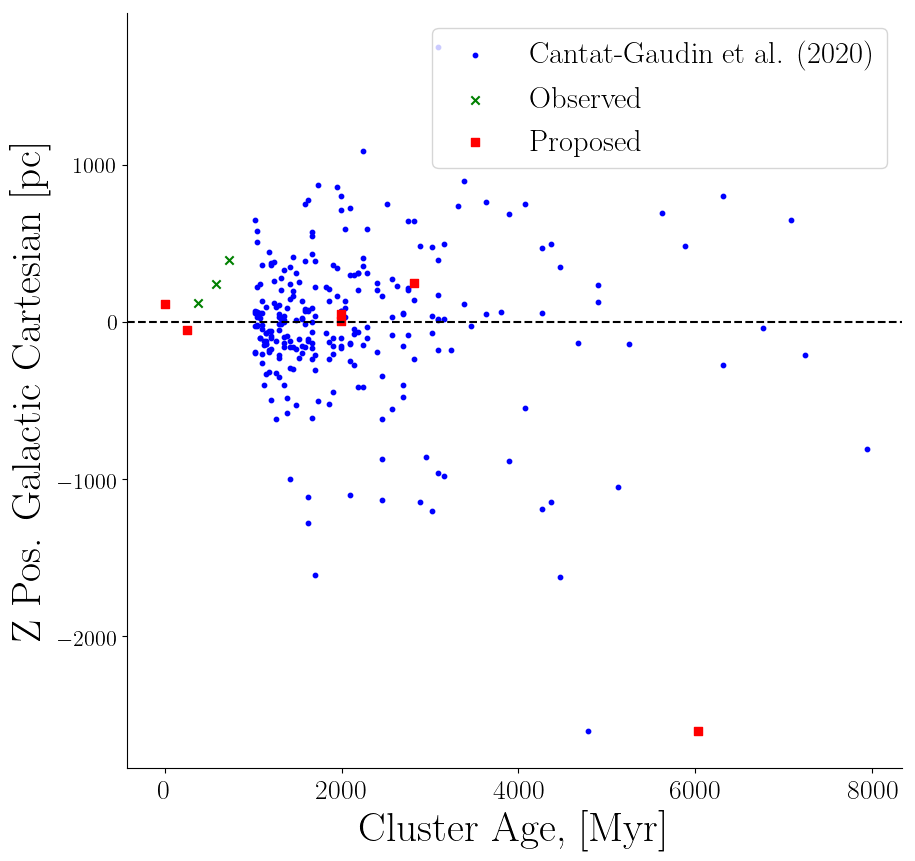

         Name    RAJ2000   DEJ2000   Age  Group    Rgc   FeH   Color  \
0  Berkeley 28  06 52 12  02 56 00  8.58      1  12702  0.20  1.1000   
1    Bochum 2   06 48 54  00 23 00  6.68      1      0 -0.02  0.9700   
2     NGC 2324  07 04 07  01 02 42  8.76      1   4214 -0.50  0.2560   
3     NGC 2355  07 16 59  13 45 00  8.86      1  10112 -0.07  0.3126   

   DistanceMod      z  e_Mod   e_Age  
0       13.700  123.0   0.50  0.0342  
1       14.790   10.8   0.05  0.0367  
2       13.300  242.0   0.10  1.9600  
3       11.603  397.0   0.15  0.0023  


In [9]:
plt.scatter(cantant_age/10**6, cantant_Z, s = 10, color = 'blue', label = 'Cantat-Gaudin et al. (2020)')
plt.scatter((10**observed_red['Age'])/10**6, observed_red['z'], marker='x', color = 'green', label = 'Observed')
plt.scatter((10**proposed['Age'])/10**6, proposed['z'], marker='s', color = 'red', label = 'Proposed')

plt.axhline(0, color = 'k', linestyle = '--')

plt.xticks(fontsize=20); plt.yticks(fontsize=16)

plt.xlabel('Cluster Age, [Myr]'); plt.ylabel('Z Pos. Galactic Cartesian [pc]')
plt.legend()
plt.savefig('plots/agevszpos.pdf')
plt.show()
print(observed)

# Plotting Images

['berkeley28_B_wcs.fits', 'NGC2324_B_wcs.fits', 'berkeley28_V_wcs.fits', '.DS_Store', '.thumbs', 'NGC2324_V_wcs.fits', 'NGC2355_B_wcs.fits', 'NGC2355_V_wcs.fits', 'Bochum2_V_wcs.fits', 'Bochum2_B_wcs.fits']


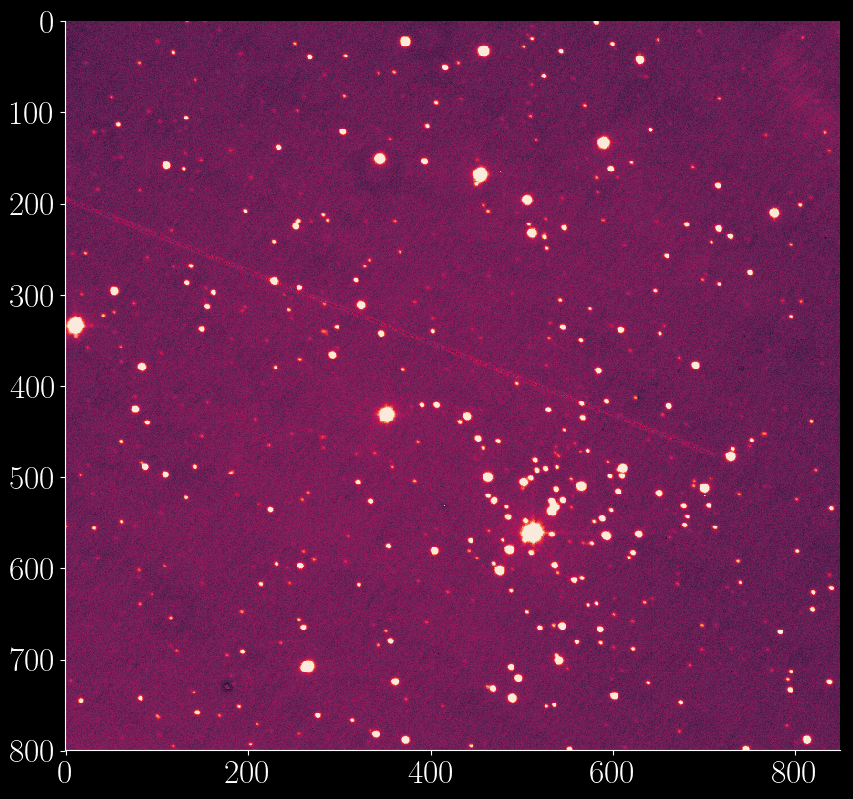

In [ ]:
files = os.listdir('astrometric_obs_data')
print(files)

data = fits.getdata('astrometric_obs_data/' + files[0])

plt.imshow(data, cmap = 'rocket', vmin = 770, vmax = 800)